In [5]:
import pandas as pd

df  = pd.read_parquet("map_scores.parquet")

df.columns

Index(['Metadata_JCP2022', 'mean_average_precision', 'p_value',
       'corrected_p_value', 'below_p', 'below_corrected_p'],
      dtype='object')

In [4]:
import plotly.express as px

In [8]:
fig = px.violin(x=df['mean_average_precision'], range_x=[0,1.02], box=True, orientation='h')
fig.update_traces(points='all', width=0.1)
fig.update_layout(height=500, width=500, font_family='sans serif', font=dict(size=20, color='black'), xaxis_title='Mean Average Precision', yaxis_title='', showlegend=False)
fig.update_layout({'plot_bgcolor':'rgba(0,0,0,0)'})
fig.update_yaxes(showline=True, linewidth=1, linecolor='black')
fig.update_xaxes(showline=True, linewidth=1, linecolor='black', tickangle=90)
fig.data = fig.data[::-1] 

fig.show()

In [ ]:
df['Metadata_JCP2022'].nunique()

1568

In [12]:
df

Metadata_JCP2022  mean_average_precision   p_value  \
0     BRD-A24397426-001-13-9                0.493059  0.003000   
1     BRD-K28550399-001-03-9                0.524774  0.000700   
2     BRD-K92760278-001-09-9                0.536183  0.000600   
3     BRD-K13387373-004-16-9                0.627053  0.000100   
4     BRD-A61676498-001-06-6                0.600502  0.000200   
...                      ...                     ...       ...   
1563  BRD-K87691185-001-01-2                0.327506  0.026297   
1564  BRD-K91535048-001-01-2                0.492524  0.002000   
1565  BRD-K91188791-001-17-5                0.396562  0.009299   
1566  BRD-A99888680-001-05-3                0.382471  0.012499   
1567  BRD-K61250553-003-30-6                0.323221  0.026997   

      corrected_p_value  below_p  below_corrected_p  
0              0.006846     True               True  
1              0.001899     True               True  
2              0.001671     True               True  
3              0.000537     True               True  
4              0.000756     True               True  
...                 ...      ...                ...  
1563           0.043960     True               True  
1564           0.004751     True               True  
1565           0.017760     True               True  
1566           0.022736     True               True  
1567           0.044748     True               True  

[1568 rows x 6 columns]

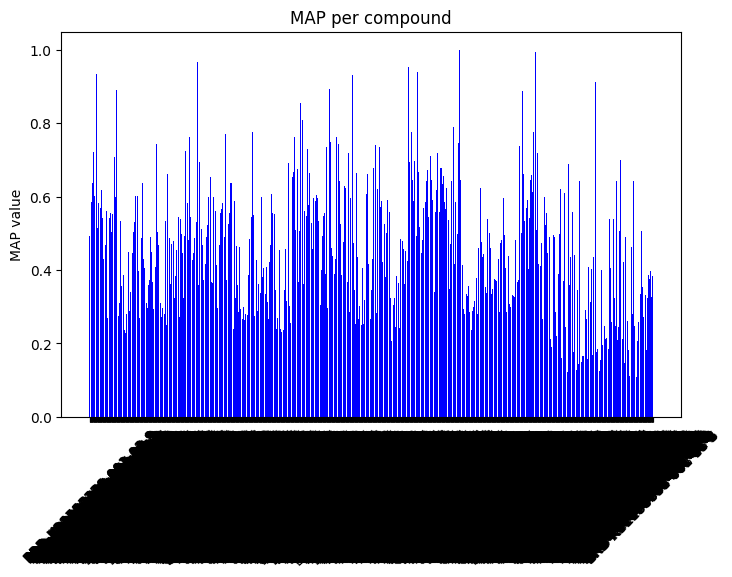

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Definir los colores: un color para 'control' y 'DMSO', otro para el resto
colores = df['Metadata_JCP2022'].apply(lambda x: 'red' if x in ['control', 'DMSO'] else 'blue')

# Crear el gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(df.index, df['mean_average_precision'], color=colores)

# Etiquetas y título
plt.ylabel('MAP value')
plt.title('MAP per compound')

# Ajustar los nombres de las barras (opcional)
plt.xticks(df.index, df['Metadata_JCP2022'], rotation=45)

# Mostrar el gráfico
plt.show()

In [9]:
def analyze_batches(file_path):
    # Leer el archivo CSV
    df = pd.read_csv(file_path)

    # Asegurarnos de que las columnas necesarias existen
    if 'Metadata_Batch' not in df.columns or 'Metadata_JCP2022' not in df.columns:
        raise ValueError("El archivo debe contener las columnas 'batch' y 'compound'.")

    # Agrupar compuestos por batch
    batch_compounds = df.groupby('Metadata_Batch')['Metadata_JCP2022'].apply(set)

    # Verificar si todos los batches tienen los mismos compuestos
    reference_set = batch_compounds.iloc[0]  # Usar el primer batch como referencia
    discrepancies = {}

    for batch, compounds in batch_compounds.items():
        if compounds != reference_set:
            discrepancies[batch] = {
                'missing_in_batch': reference_set - compounds,
                'extra_in_batch': compounds - reference_set
            }

    # Resultado
    if discrepancies:
        print("Discrepancias encontradas:")
        for batch, diff in discrepancies.items():
            print(f"\nBatch: {batch}")
            print(f"- Compuestos faltantes: {diff['missing_in_batch']}")
            print(f"- Compuestos adicionales: {diff['extra_in_batch']}")
    else:
        print("Todos los batches contienen los mismos compuestos.")

In [10]:
analyze_batches("combined_metadata.csv")

Discrepancias encontradas:

Batch: 2022_11_28_Batch2
- Compuestos faltantes: set()
- Compuestos adicionales: {'DMSO'}

Batch: 2022_11_28_Batch3
- Compuestos faltantes: set()
- Compuestos adicionales: {'DMSO'}

Batch: 2022_11_28_Batch4
- Compuestos faltantes: set()
- Compuestos adicionales: {'DMSO'}

Batch: 2022_11_28_Batch5
- Compuestos faltantes: {'BRD-K23913458-001-20-7', 'BRD-K14681867-001-01-6', 'BRD-K80666802-003-02-9', 'BRD-K60476892-001-17-9', 'BRD-K16803204-001-02-9', 'BRD-K25244359-066-04-9', 'BRD-K50495309-001-02-0', 'BRD-K94863486-001-02-2', 'BRD-K93788137-001-05-9', 'BRD-K97010173-001-04-1', 'BRD-K57708067-001-02-9', 'BRD-A72351335-001-04-5', 'BRD-K38512030-001-01-7', 'BRD-K43570081-001-02-4', 'BRD-K87782578-001-03-9', 'BRD-K16472653-001-03-9', 'BRD-K87158025-003-09-9', 'BRD-K61250553-003-30-6', 'BRD-K73789395-001-09-9', 'BRD-K22134346-001-21-5', 'BRD-K15502390-001-19-1', 'BRD-K24616672-003-19-3', 'BRD-A25569250-001-03-3', 'BRD-A48180038-003-24-3', 'BRD-K51265828-001-02-9',

In [2]:
import pandas as pd
input=pd.read_parquet("outputs/orf/profiles_wellpos_cc_var_mad_outlier_featselect_sphering_harmony.parquet")

In [3]:
input.shape

(45264, 647)